In [109]:
import numpy as np
import pandas as pd
from sympy import symbols, expand
import matplotlib.pyplot as plt

In [110]:
# Titik data
t_points = np.array([0, 60, 120, 180, 240, 300, 360, 420, 480, 540])  # Titik t
x_points = np.array([0, 2.73, 2.70, 2.62, 2.68, 2.68, 2.64, 2.72, 2.69, 2.55])  # Nilai fungsi x(t)
y_points = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45])  # Nilai fungsi y(t)

In [111]:
# Algoritma divided differences
def divided_differences(t, f):
    n = len(f)
    table = np.zeros((n, n))
    table[:, 0] = f  # Kolom pertama adalah nilai fungsi

    for j in range(1, n):  # Iterasi over kolom
        for i in range(n - j):  # Iterasi over baris
            table[i, j] = (table[i + 1, j - 1] - table[i, j - 1]) / (t[i + j] - t[i])

    return table[0], table  # Koefisien polinomial ada di baris pertama

In [112]:
# Evaluasi polinomial Newton
def evaluate_newton_polynomial(coefficients, t_points, t_eval):
    n = len(coefficients)
    result = np.zeros_like(t_eval, dtype=float)
    for i in range(n):
        term = coefficients[i]
        for j in range(i):
            term *= (t_eval - t_points[j])
        result += term
    return result

In [113]:
# Hitung koefisien polinomial Newton untuk x dan y
x_coefficients, x_dd_table = divided_differences(t_points, x_points)
y_coefficients, y_dd_table = divided_differences(t_points, y_points)

In [115]:
# Evaluasi polinomial Newton p9(t)
t_eval = np.arange(0, 541, 1)  # Interval evaluasi setiap 1 frame
p9_x = evaluate_newton_polynomial(x_coefficients, t_points, t_eval)
p9_y = evaluate_newton_polynomial(y_coefficients, t_points, t_eval)

In [116]:
# Tambahkan titik baru untuk p10(t)
t_new = 600
x_new = 2.336957
y_new = 50

In [117]:
def compute_c10(t_points, f_points, t_new, f_new):
    product = 1
    for t in t_points:
        product *= (t_new - t)
    residual = f_new - evaluate_newton_polynomial(f_points, t_points, np.array([t_new]))[0]
    return residual / product

In [118]:
# Hitung c10 untuk x dan y
c10_x = compute_c10(t_points, x_coefficients, t_new, x_new)
c10_y = compute_c10(t_points, y_coefficients, t_new, y_new)

# Evaluasi polinomial Newton p10(t)
p10_x = evaluate_newton_polynomial(
    np.append(x_coefficients, c10_x),
    np.append(t_points, t_new),
    t_eval
)
p10_y = evaluate_newton_polynomial(
    np.append(y_coefficients, c10_y),
    np.append(t_points, t_new),
    t_eval
)

/var/folders/gw/m4jgkpmn499g8_gnqxyz532w0000gn/T/ipykernel_52027/3929375691.py:4: RuntimeWarning: overflow encountered in scalar multiply
  product *= (t_new - t)


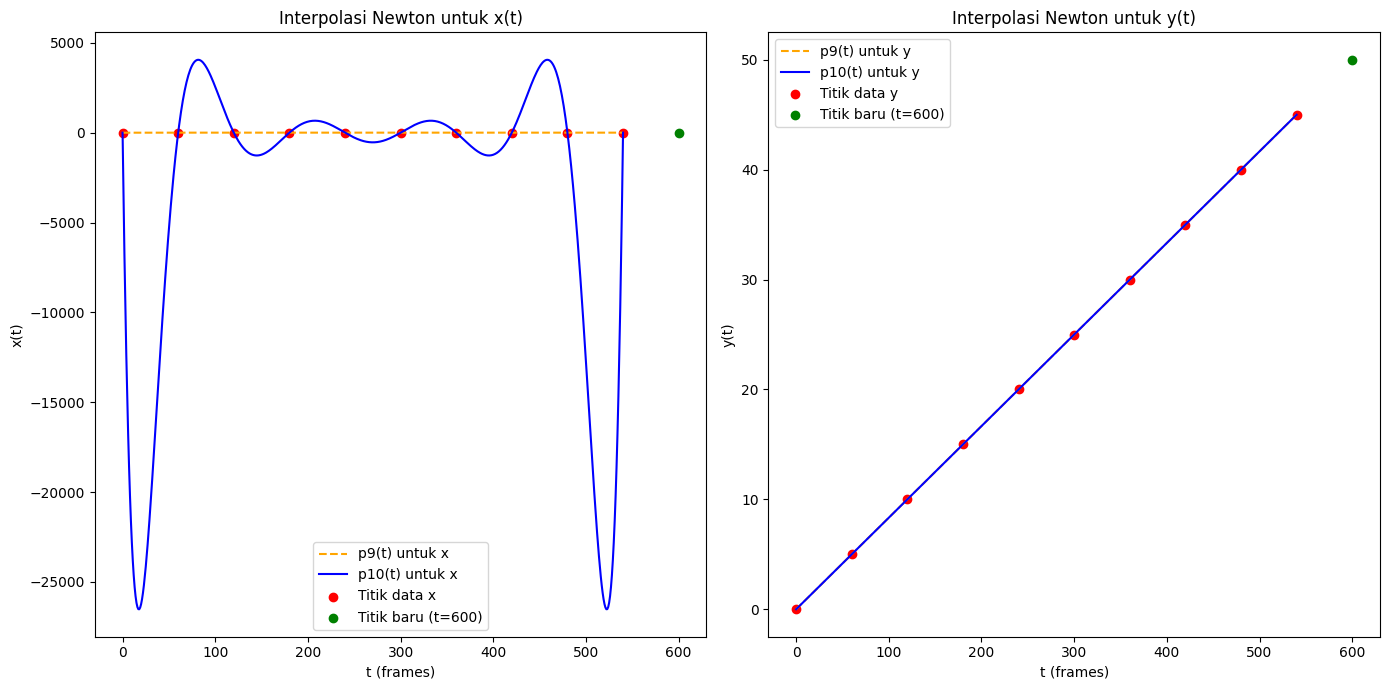

In [119]:
# Plot hasil interpolasi p9(t) dan p10(t)
plt.figure(figsize=(14, 7))

# Plot untuk x(t)
plt.subplot(1, 2, 1)
plt.plot(t_eval, p9_x, '--', label="p9(t) untuk x", color='orange')
plt.plot(t_eval, p10_x, '-', label="p10(t) untuk x", color='blue')
plt.scatter(t_points, x_points, color='red', label="Titik data x")
plt.scatter([t_new], [x_new], color='green', label="Titik baru (t=600)")
plt.title("Interpolasi Newton untuk x(t)")
plt.xlabel("t (frames)")
plt.ylabel("x(t)")
plt.legend()

# Plot untuk y(t)
plt.subplot(1, 2, 2)
plt.plot(t_eval, p9_y, '--', label="p9(t) untuk y", color='orange')
plt.plot(t_eval, p10_y, '-', label="p10(t) untuk y", color='blue')
plt.scatter(t_points, y_points, color='red', label="Titik data y")
plt.scatter([t_new], [y_new], color='green', label="Titik baru (t=600)")
plt.title("Interpolasi Newton untuk y(t)")
plt.xlabel("t (frames)")
plt.ylabel("y(t)")
plt.legend()

plt.tight_layout()
plt.show()

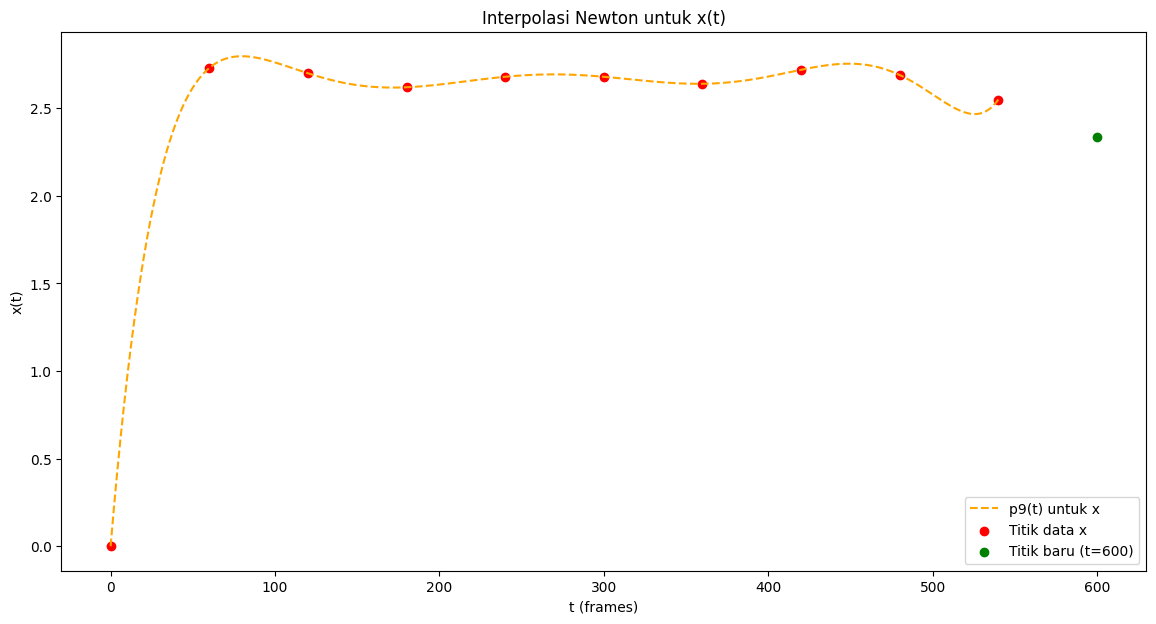

In [120]:
# Plot hasil interpolasi p9(t) dan p10(t)
plt.figure(figsize=(14, 7))

# Plot untuk x(t)
plt.plot(t_eval, p9_x, '--', label="p9(t) untuk x", color='orange')
plt.scatter(t_points, x_points, color='red', label="Titik data x")
plt.scatter([t_new], [x_new], color='green', label="Titik baru (t=600)")
plt.title("Interpolasi Newton untuk x(t)")
plt.xlabel("t (frames)")
plt.ylabel("x(t)")
plt.legend()